In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import math as math
from scipy.stats import boxcox
from random import randrange
from random import seed
from random import random
from random import gauss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Multiply, Concatenate, Dropout
from pyod.models.knn import KNN 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_auc_score,roc_curve,auc
# Importing the libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pyod
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pyod
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pyod
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.sod import SOD
from pyod.models.pca import PCA
from pyod.models.kpca import KPCA
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.lmdd import LMDD
from pyod.models.hbos import HBOS
from pyod.models.rod import ROD
from pyod.models.cof import COF

from pyod.models.ecod import ECOD
from pyod.models.copod import COPOD
from pyod.models.abod import ABOD
from pyod.models.mad import MAD
from pyod.models.sos import SOS
from pyod.models.qmcd import QMCD
from pyod.models.kde import KDE
from pyod.models.sampling import Sampling
from pyod.models.gmm import GMM
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.deep_svdd import DeepSVDD
from pyod.models.rgraph import RGraph

from pyod.models.ecod import ECOD
from pyod.models.copod import COPOD
from pyod.models.abod import ABOD
from pyod.models.mad import MAD
from pyod.models.sos import SOS
from pyod.models.qmcd import QMCD
from pyod.models.kde import KDE
from pyod.models.sampling import Sampling
from pyod.models.gmm import GMM
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.deep_svdd import DeepSVDD
from pyod.models.xgbod import XGBOD
from pyod.models.loda import LODA
from pyod.models.inne import INNE
from pyod.models.suod import SUOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.iforest import IForest

from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("synthetic_weather_data_wo_label_30anomalyinjected.csv",header=0, index_col=0, parse_dates=True)
data_labeled=pd.read_csv("synthetic_weather_data_wi_label_supervised_30anomalyinjected.csv",header=0, index_col=0, parse_dates=True)

In [3]:
# Not on same scale and need to split the data to the train and test part 
Ntest = 1096   # 3 year
train= data.iloc[:-Ntest].copy()
test= data.iloc[-Ntest:].copy()

scaler_temp= RobustScaler()
train['ScaledTemp'] = scaler_temp.fit_transform(train[['temperature']])
test['ScaledTemp'] = scaler_temp.transform(test[['temperature']])

scaler_humid= RobustScaler()
train['ScaledHumid'] = scaler_humid.fit_transform(train[['humidity']])
test['ScaledHumid'] = scaler_humid.transform(test[['humidity']])

scaler_pressure= RobustScaler()
train['ScaledPressure'] = scaler_pressure.fit_transform(train[['pressure']])
test['ScaledPressure'] = scaler_pressure.transform(test[['pressure']])

train_idx = data.index <=train.index[-1]
test_idx = data.index > train.index[-1]

data.loc[train_idx, 'ScaledTemp']= train['ScaledTemp']
data.loc[test_idx, 'ScaledTemp']= test['ScaledTemp']

data.loc[train_idx, 'ScaledHumid']= train['ScaledHumid']
data.loc[test_idx, 'ScaledHumid']= test['ScaledHumid']

data.loc[train_idx, 'ScaledPressure']= train['ScaledPressure']
data.loc[test_idx, 'ScaledPressure']= test['ScaledPressure']

<AxesSubplot: xlabel='date'>

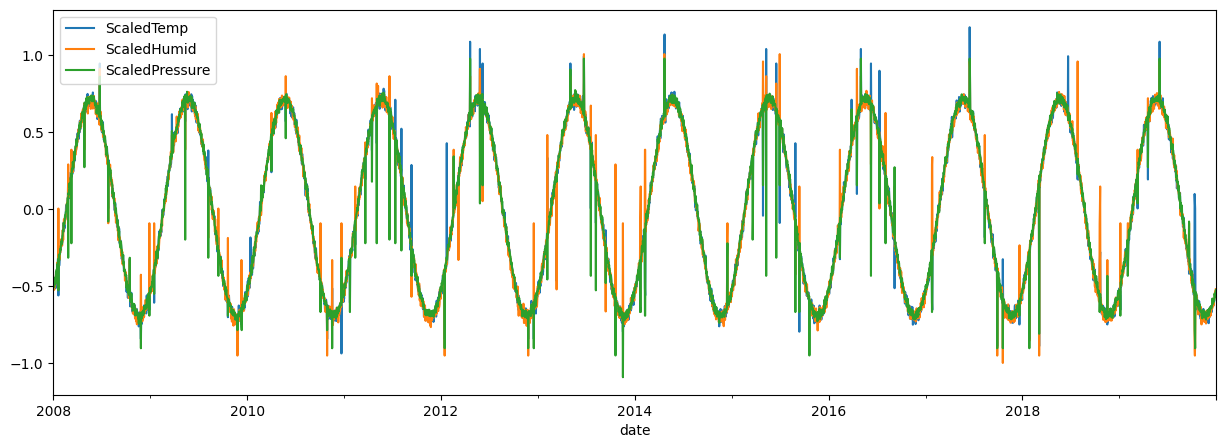

In [4]:
cols = ['ScaledTemp', 'ScaledHumid', 'ScaledPressure']
train[cols].plot(figsize=(15,5))

<AxesSubplot: xlabel='date'>

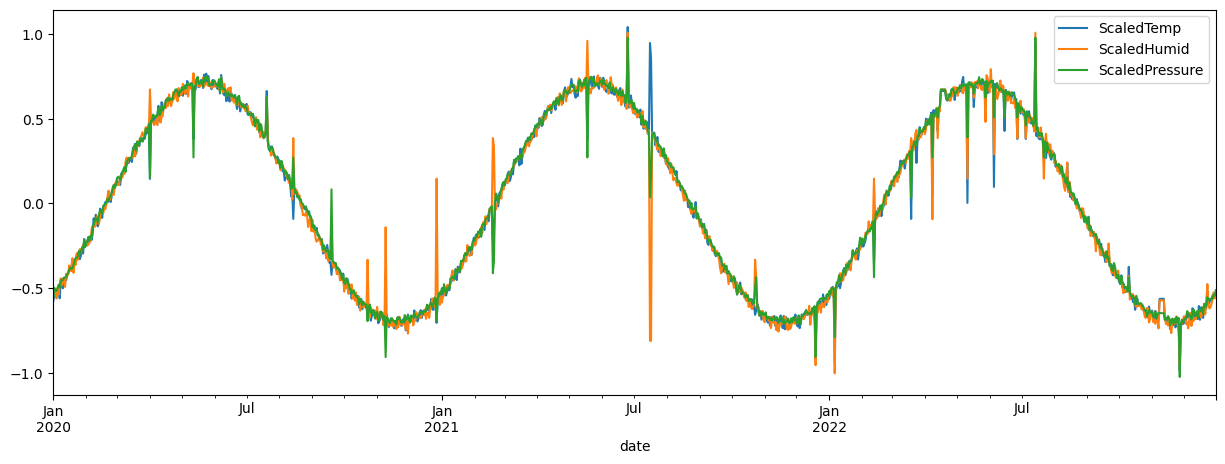

In [5]:
cols = ['ScaledTemp', 'ScaledHumid', 'ScaledPressure']
test[cols].plot(figsize=(15,5))

In [6]:
df_combined=[train[cols],test[cols]]
df_combined=pd.concat(df_combined, axis=0)

### Physical Modeling with VAR when 3 year test set and 50 lag

In [7]:
lag_order = 50

In [8]:
"""temp_pred= 0.15*temp(t-1)+0.04*temp(t-2)+0.03*humid(t-2)+0.03*humid(t-5)+0.05*temp(t-6)+0.03*humid(t-9)+0.03*temp(t-10)
              +0.03*humid(t-12)+0.05*pressure(t-13)+0.03*humid(t-15)+0.03*pressure(t-15)+0.03*pressure(t-18)+0.03*humid(t-21)
              -0.03*pressure(t-32)+0.05*temp(t-37)-0.03*pressure(t-38)-0.05*temp(t-49)-0.03*temp(t-50)-0.03*pressure(t-50)"""

'temp_pred= 0.15*temp(t-1)+0.04*temp(t-2)+0.03*humid(t-2)+0.03*humid(t-5)+0.05*temp(t-6)+0.03*humid(t-9)+0.03*temp(t-10)\n              +0.03*humid(t-12)+0.05*pressure(t-13)+0.03*humid(t-15)+0.03*pressure(t-15)+0.03*pressure(t-18)+0.03*humid(t-21)\n              -0.03*pressure(t-32)+0.05*temp(t-37)-0.03*pressure(t-38)-0.05*temp(t-49)-0.03*temp(t-50)-0.03*pressure(t-50)'

In [9]:
"""humid_pred= 0.20*humid(t-1)+0.03*pressure(t-3)+0.04*pressure(t-10)+0.03*humid(t-11)+0.05*temp(t-28)+0.04*humid(t-28)
            -0.04*temp(t-32)+0.04*temp(t-37)+0.03*pressure(t-37)-0.04*pressure(t-38)-0.04*humid(t-47)-0.04*pressure(t-48)"""

'humid_pred= 0.20*humid(t-1)+0.03*pressure(t-3)+0.04*pressure(t-10)+0.03*humid(t-11)+0.05*temp(t-28)+0.04*humid(t-28)\n            -0.04*temp(t-32)+0.04*temp(t-37)+0.03*pressure(t-37)-0.04*pressure(t-38)-0.04*humid(t-47)-0.04*pressure(t-48)'

In [10]:
"""pressure_pred= 0.03*humid(t-1)+0.09*pressure(t-1)+0.03*humid(t-2)+0.04*temp(t-6)+0.03*pressure(t-10)+0.05*temp(t-12)
                 +0.04*pressure(t-12)+0.03*humid(t-15)+0.03*pressure(t-18)+0.03*temp(t-19)-0.07*temp(t-38)-0.03*humid(t-38)
                  0.06*pressure(t-38)-0.04*temp(t-49)-0.03*humid(t-50)"""

'pressure_pred= 0.03*humid(t-1)+0.09*pressure(t-1)+0.03*humid(t-2)+0.04*temp(t-6)+0.03*pressure(t-10)+0.05*temp(t-12)\n                 +0.04*pressure(t-12)+0.03*humid(t-15)+0.03*pressure(t-18)+0.03*temp(t-19)-0.07*temp(t-38)-0.03*humid(t-38)\n                  0.06*pressure(t-38)-0.04*temp(t-49)-0.03*humid(t-50)'

In [11]:
df_laggedtemp=pd.DataFrame()
df_laggedtemp['temp_L1']=df_combined['ScaledTemp'].shift(1)
df_laggedtemp['temp_L2']=df_combined['ScaledTemp'].shift(2)
df_laggedtemp['humid_L2']=df_combined['ScaledHumid'].shift(2)
df_laggedtemp['humid_L5']=df_combined['ScaledHumid'].shift(5)
df_laggedtemp['temp_L6']=df_combined['ScaledTemp'].shift(6)
df_laggedtemp['humid_L9']=df_combined['ScaledHumid'].shift(9)
df_laggedtemp['temp_L10']=df_combined['ScaledTemp'].shift(10)
df_laggedtemp['humid_L12']=df_combined['ScaledHumid'].shift(12)
df_laggedtemp['pressure_L13']=df_combined['ScaledPressure'].shift(13)
df_laggedtemp['humid_L15']=df_combined['ScaledHumid'].shift(15)
df_laggedtemp['pressure_L15']=df_combined['ScaledPressure'].shift(15)
df_laggedtemp['pressure_L18']=df_combined['ScaledPressure'].shift(18)
df_laggedtemp['humid_L21']=df_combined['ScaledHumid'].shift(21)
df_laggedtemp['pressure_L32']=df_combined['ScaledPressure'].shift(32)
df_laggedtemp['temp_L37']=df_combined['ScaledTemp'].shift(37)
df_laggedtemp['pressure_L38']=df_combined['ScaledPressure'].shift(38)
df_laggedtemp['temp_L49']=df_combined['ScaledTemp'].shift(49)
df_laggedtemp['temp_L50']=df_combined['ScaledTemp'].shift(50)
df_laggedtemp['pressure_L50']=df_combined['ScaledPressure'].shift(50)

In [12]:
df_vartemp=[df_laggedtemp['temp_L1'],df_laggedtemp['temp_L2'],df_laggedtemp['humid_L2'],df_laggedtemp['humid_L5'],
            df_laggedtemp['temp_L6'],df_laggedtemp['humid_L9'],df_laggedtemp['temp_L10'],
            df_laggedtemp['humid_L12'],df_laggedtemp['pressure_L13'],
            df_laggedtemp['humid_L15'],df_laggedtemp['pressure_L15'],
            df_laggedtemp['pressure_L18'],df_laggedtemp['humid_L21'],
            df_laggedtemp['pressure_L32'],df_laggedtemp['temp_L37'],
            df_laggedtemp['pressure_L38'],df_laggedtemp['temp_L49'],
            df_laggedtemp['temp_L50'],df_laggedtemp['pressure_L50']]
df_vartemp=pd.concat(df_vartemp,axis=1)

### Humidity prediction from VAR Model

In [13]:
"""humid_pred= 0.20*humid(t-1)+0.03*pressure(t-3)+0.04*pressure(t-10)+0.03*humid(t-11)+0.05*temp(t-28)+0.04*humid(t-28)
            -0.04*temp(t-32)+0.04*temp(t-37)+0.03*pressure(t-37)-0.04*pressure(t-38)-0.04*humid(t-47)-0.04*pressure(t-48)"""

'humid_pred= 0.20*humid(t-1)+0.03*pressure(t-3)+0.04*pressure(t-10)+0.03*humid(t-11)+0.05*temp(t-28)+0.04*humid(t-28)\n            -0.04*temp(t-32)+0.04*temp(t-37)+0.03*pressure(t-37)-0.04*pressure(t-38)-0.04*humid(t-47)-0.04*pressure(t-48)'

In [14]:
df_laggedhumid=pd.DataFrame()
df_laggedhumid['humid_L1']=df_combined['ScaledHumid'].shift(1)
df_laggedhumid['pressure_L3']=df_combined['ScaledPressure'].shift(3)
df_laggedhumid['pressure_L10']=df_combined['ScaledPressure'].shift(10)
df_laggedhumid['humid_L11']=df_combined['ScaledHumid'].shift(11)
df_laggedhumid['temp_L28']=df_combined['ScaledTemp'].shift(28)
df_laggedhumid['humid_L28']=df_combined['ScaledHumid'].shift(28)
df_laggedhumid['temp_L32']=df_combined['ScaledTemp'].shift(32)
df_laggedhumid['pressure_L37']=df_combined['ScaledPressure'].shift(37)
df_laggedhumid['humid_L47']=df_combined['ScaledHumid'].shift(47)
df_laggedhumid['pressure_L48']=df_combined['ScaledPressure'].shift(48)

In [15]:
df_varhumid=[df_laggedhumid['humid_L1'],df_laggedhumid['pressure_L3'],df_laggedhumid['pressure_L10'],
             df_laggedhumid['humid_L11'],df_laggedhumid['temp_L28'],df_laggedhumid['humid_L28'],df_laggedhumid['temp_L32'],
             df_laggedhumid['pressure_L37'],df_laggedhumid['humid_L47'],
             df_laggedhumid['pressure_L48']]
df_varhumid=pd.concat(df_varhumid,axis=1)

### Pressure prediction from VAR Model

In [16]:
"""pressure_pred= 0.03*humid(t-1)+0.09*pressure(t-1)+0.03*humid(t-2)+0.04*temp(t-6)+0.03*pressure(t-10)+0.05*temp(t-12)
                 +0.04*pressure(t-12)+0.03*humid(t-15)+0.03*pressure(t-18)+0.03*temp(t-19)-0.07*temp(t-38)-0.03*humid(t-38)
                  0.06*pressure(t-38)-0.04*temp(t-49)-0.03*humid(t-50)"""

'pressure_pred= 0.03*humid(t-1)+0.09*pressure(t-1)+0.03*humid(t-2)+0.04*temp(t-6)+0.03*pressure(t-10)+0.05*temp(t-12)\n                 +0.04*pressure(t-12)+0.03*humid(t-15)+0.03*pressure(t-18)+0.03*temp(t-19)-0.07*temp(t-38)-0.03*humid(t-38)\n                  0.06*pressure(t-38)-0.04*temp(t-49)-0.03*humid(t-50)'

In [17]:
df_laggedpressure=pd.DataFrame()
df_laggedpressure['pressure_L1']=df_combined['ScaledPressure'].shift(1)
df_laggedpressure['temp_L12']=df_combined['ScaledTemp'].shift(12)
df_laggedpressure['pressure_L12']=df_combined['ScaledPressure'].shift(12)
df_laggedpressure['temp_L19']=df_combined['ScaledTemp'].shift(19)
df_laggedpressure['temp_L38']=df_combined['ScaledTemp'].shift(38)
df_laggedpressure['humid_L38']=df_combined['ScaledHumid'].shift(38)
df_laggedpressure['humid_L50']=df_combined['ScaledHumid'].shift(50)

In [18]:
df_varpressure=[df_laggedpressure['pressure_L1'],
                        df_laggedpressure['temp_L12'],
                        df_laggedpressure['pressure_L12'],
                        df_laggedpressure['temp_L19'],
                        df_laggedpressure['temp_L38'],df_laggedpressure['humid_L38'],
                        df_laggedpressure['humid_L50']]
df_varpressure=pd.concat(df_varpressure,axis=1)

In [19]:
df=[df_vartemp,df_varhumid,df_varpressure,df_combined]
df=pd.concat(df, axis=1)

In [20]:
df.dropna(inplace=True)

In [21]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
# Not on same scale and need to split the data to the train and test part 
nest_samples = 1096  # 3 year
train_data = df.iloc[:-nest_samples].copy()
test_data = df.iloc[-nest_samples:].copy()

In [22]:
features = [col for col in df.columns if col not in ['ScaledTemp', 'ScaledHumid', 'ScaledPressure']]
X_train, y_train = train_data[features], train_data[['ScaledTemp', 'ScaledHumid', 'ScaledPressure']] #Split into X and Y. training data.

In [23]:
x_test, y_test = test_data[features], test_data[['ScaledTemp', 'ScaledHumid', 'ScaledPressure']]

In [24]:
input_tensor = Input(shape=(36,1))
hidden1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_tensor)
hidden2 = Conv1D(filters=64, kernel_size=3, activation='relu')(hidden1)
hidden3 = Conv1D(filters=64, kernel_size=3, activation='relu')(hidden2)
flatten = Flatten()(hidden3)
coeffs_temp = Dense(36)(flatten)
coeffs_humid = Dense(36)(flatten)
coeffs_pressure = Dense(36)(flatten)
flatened_ip = Flatten()(input_tensor)
mul_temp = Multiply()([coeffs_temp, flatened_ip])
mul_humidity = Multiply()([coeffs_humid, flatened_ip])
mul_pressure = Multiply()([coeffs_pressure, flatened_ip])
temp = tf.reduce_sum(mul_temp, axis= -1, keepdims=True)
humid = tf.reduce_sum(mul_humidity, axis= -1, keepdims=True)
pressure =tf.reduce_sum(mul_pressure, axis= -1, keepdims=True)
output=Concatenate(axis=1)([temp, humid, pressure])
model_cnn = Model(input_tensor, output)

In [25]:
#optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model_cnn.compile(loss='mean_absolute_error', optimizer='adam')

In [26]:
model_cnn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 36, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 34, 64)       256         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 32, 64)       12352       ['conv1d[0][0]']                 
                                                                                                  
 conv1d_2 (Conv1D)              (None, 30, 64)       12352       ['conv1d_1[0][0]']               
                                                                                              

In [27]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('cnn_best_model_3yrTestdata.h5',
    monitor='val_loss',
    save_best_only= True,
    save_weights_only= True,
    mode= 'min'
)

In [28]:
X_train = np.expand_dims(X_train, -1)
y_train = np.expand_dims(y_train, -1)

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, min_delta=0.0001, mode ="min" ,restore_best_weights=True)
history = model_cnn.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, validation_split=0.1, callbacks=[callback,checkpoint])

Epoch 1/100
244/244 [==============================] - 3s 8ms/step - loss: 0.0579 - val_loss: 0.0315
Epoch 2/100
244/244 [==============================] - 2s 7ms/step - loss: 0.0333 - val_loss: 0.0296
Epoch 3/100
244/244 [==============================] - 2s 7ms/step - loss: 0.0314 - val_loss: 0.0281
Epoch 4/100
244/244 [==============================] - 2s 7ms/step - loss: 0.0302 - val_loss: 0.0314
Epoch 5/100
244/244 [==============================] - 2s 7ms/step - loss: 0.0295 - val_loss: 0.0348
Epoch 6/100
244/244 [==============================] - 2s 7ms/step - loss: 0.0294 - val_loss: 0.0278
Epoch 7/100
244/244 [==============================] - 2s 7ms/step - loss: 0.0289 - val_loss: 0.0288
Epoch 8/100
244/244 [==============================] - 2s 7ms/step - loss: 0.0284 - val_loss: 0.0286
Epoch 9/100
244/244 [==============================] - 2s 7ms/step - loss: 0.0283 - val_loss: 0.0282
Epoch 10/100
244/244 [==============================] - 2s 6ms/step - loss: 0.0282 - val_lo

In [30]:
model_cnn.load_weights('cnn_best_model_3yrTestdata.h5')

In [31]:
prediction = model_cnn.predict(x_test.values)

35/35 [==============================] - 0s 3ms/step


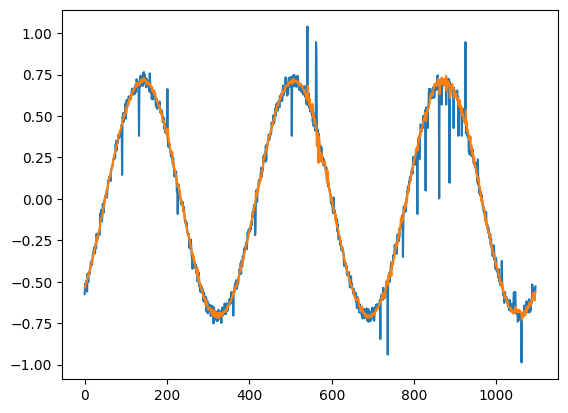

In [32]:
import matplotlib.pyplot as plt
plt.plot(y_test.values[:,0])
plt.plot(prediction[:,0])

In [33]:
Ntest=1096
le=LabelEncoder()

y = data_labeled.iloc[:, -1].values
ground_truth_train = y[:-Ntest].copy()
ground_truth_test = y[-Ntest:].copy()

ground_truth_train = le.fit_transform(ground_truth_train)
ground_truth_test = le.transform(ground_truth_test)

### Data preparation for kNN

In [34]:
#test_data(Predicted+actual)
data_temp_test = pd.DataFrame({'predicted_temp': prediction[:,0], 'actual_temp': y_test.values[:,0]})
data_humidity_test = pd.DataFrame({'predicted_humid': prediction[:,1], 'actual_humid': y_test.values[:,1]})
data_pressure_test = pd.DataFrame({'predicted_pressure': prediction[:,2], 'actual_pressure': y_test.values[:,2]})
data_kNN_test=pd.concat([data_temp_test,data_humidity_test,data_pressure_test],axis=1)

In [35]:
data_kNN_test.shape

(1096, 6)

### Proximity-based algorithms

In [36]:
# neighbour based
classifier_name = 'KNN'
# model_knn = KNN()  # with default parameters.
model_knn = KNN()

# Prediction on training data
model_knn.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction = model_knn.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_scores = model_knn.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction = model_knn.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_scores = model_knn.predict_proba(data_kNN_test)[:,1]

In [37]:
unique, counts = np.unique(test_prediction, return_counts=True)
print("\nOutlier prediction information on Test Data:", len(data_kNN_test), dict(zip(unique, counts)))
# no of errors in test set
number_of_errors = (test_prediction != ground_truth_test).sum()
print('No of Errors in test set: {}'.format(number_of_errors))
rms = mean_squared_error(ground_truth_test, test_prediction, squared=False)
mae = mean_absolute_error(ground_truth_test, test_prediction)
print('\nRMS on Test Set :',rms)
print('\nMAE on Test Set :',mae)


Outlier prediction information on Test Data: 1096 {0: 1006, 1: 90}
No of Errors in test set: 58

RMS on Test Set : 0.23004283955210839

MAE on Test Set : 0.05291970802919708


In [63]:
#HM+AD data Confusion Matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(ground_truth_test, model_knn.predict(data_kNN_test))

array([[998,  50],
       [  8,  40]], dtype=int64)

In [38]:
#local-density based
classifier_name = 'LOF'

model_lof = LOF()

# Prediction on training data
model_lof.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_lof = model_lof.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_lof_scores = model_lof.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_lof = model_lof.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_lof_scores = model_lof.predict_proba(data_kNN_test)[:,1]

In [39]:
#CBLOF

classifier_name = 'CBLOF'

model_cblof = CBLOF()

# Prediction on training data
model_cblof.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_cblof = model_cblof.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_cblof_scores = model_cblof.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_cblof = model_cblof.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_cblof_scores = model_cblof.predict_proba(data_kNN_test)[:,1]

In [40]:
#HBOS

classifier_name = 'HBOS'

model_hbos = HBOS()

# Prediction on training data
model_hbos.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_hbos = model_hbos.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_hbos_scores = model_hbos.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_hbos = model_hbos.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_hbos_scores = model_hbos.predict_proba(data_kNN_test)[:,1]

In [41]:
#ROD

classifier_name = 'ROD'

model_rod = ROD()

# Prediction on training data
model_rod.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_rod = model_rod.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_rod_scores = model_rod.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_rod = model_rod.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_rod_scores = model_rod.predict_proba(data_kNN_test)[:,1]

In [42]:
#COF

classifier_name = 'COF'

model_cof = COF()

# Prediction on training data
model_cof.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_cof = model_cof.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_cof_scores = model_cof.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_cof = model_cof.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_cof_scores = model_cof.predict_proba(data_kNN_test)[:,1]

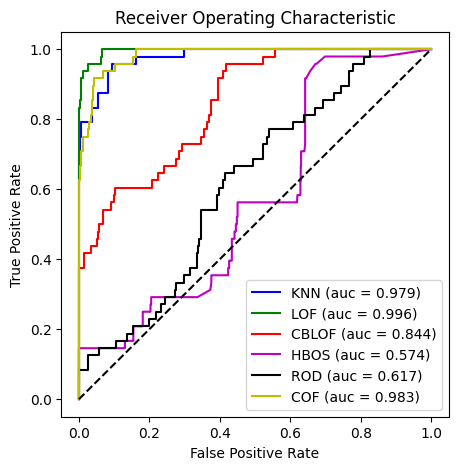

In [43]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(ground_truth_test, test_prediction_scores)
fpr, tpr, thresholds = roc_curve(ground_truth_test, test_prediction_scores)
auc_kNN = auc(fpr,tpr)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_lof_scores)
fpr_lof, tpr_lof, thresholds_lof = roc_curve(ground_truth_test, test_prediction_lof_scores)
auc_lof = auc(fpr_lof,tpr_lof)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_cblof_scores)
fpr_cblof, tpr_cblof, thresholds_cblof = roc_curve(ground_truth_test, test_prediction_cblof_scores)
auc_cblof = auc(fpr_cblof,tpr_cblof)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_hbos_scores)
fpr_hbos, tpr_hbos, thresholds_hbos = roc_curve(ground_truth_test, test_prediction_hbos_scores)
auc_hbos = auc(fpr_hbos,tpr_hbos)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_rod_scores)
fpr_rod, tpr_rod, thresholds_rod = roc_curve(ground_truth_test, test_prediction_rod_scores)
auc_rod = auc(fpr_rod,tpr_rod)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_cof_scores)
fpr_cof, tpr_cof, thresholds_cof = roc_curve(ground_truth_test, test_prediction_cof_scores)
auc_cof = auc(fpr_cof,tpr_cof)


plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', color='b', label='KNN (auc = %0.3f)' % auc_kNN)

plt.plot(fpr_lof, tpr_lof, linestyle='-', color='g', label='LOF (auc = %0.3f)' % auc_lof)

plt.plot(fpr_cblof, tpr_cblof, linestyle='-', color='r', label='CBLOF (auc = %0.3f)' % auc_cblof)

plt.plot(fpr_hbos, tpr_hbos, linestyle='-', color='m', label='HBOS (auc = %0.3f)' % auc_hbos)

plt.plot(fpr_rod, tpr_rod, linestyle='-', color='k', label='ROD (auc = %0.3f)' % auc_rod)

plt.plot(fpr_cof, tpr_cof, linestyle='-', color='y', label='COF (auc = %0.3f)' % auc_cof)


plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [44]:
# knn, lof and cof worked better.

### Linear Model

In [45]:
#PCA

classifier_name = 'PCA'

model_pca = PCA()

# Prediction on training data
model_pca.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_pca = model_pca.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_pca_scores = model_pca.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_pca = model_pca.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_pca_scores = model_pca.predict_proba(data_kNN_test)[:,1]

In [46]:
#KPCA

classifier_name = 'KPCA'

model_kpca = KPCA(kernel='rbf')

# Prediction on training data
model_kpca.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_kpca = model_kpca.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_kpca_scores = model_kpca.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_kpca = model_kpca.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_kpca_scores = model_kpca.predict_proba(data_kNN_test)[:,1]

In [47]:
#MCD

classifier_name = 'MCD'

model_mcd = MCD()

# Prediction on training data
model_mcd.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_mcd = model_mcd.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_mcd_scores = model_mcd.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_mcd = model_mcd.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_mcd_scores = model_mcd.predict_proba(data_kNN_test)[:,1]

In [48]:
#OCSVM

classifier_name = 'OCSVM'

model_ocsvm = OCSVM()

# Prediction on training data
model_ocsvm.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_ocsvm = model_ocsvm.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_ocsvm_scores = model_ocsvm.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_ocsvm = model_ocsvm.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_ocsvm_scores = model_ocsvm.predict_proba(data_kNN_test)[:,1]

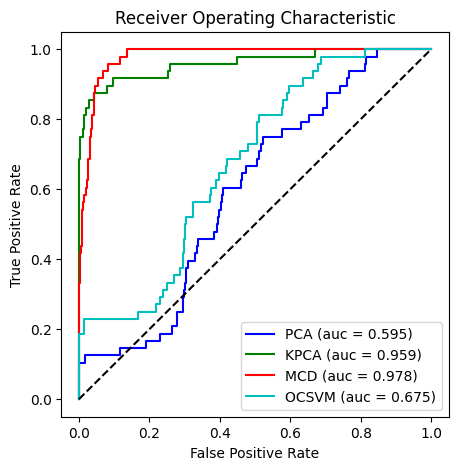

In [49]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(ground_truth_test, test_prediction_pca_scores)
fpr_pca, tpr_pca, thresholds_pca = roc_curve(ground_truth_test, test_prediction_pca_scores)
auc_pca = auc(fpr_pca,tpr_pca)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_kpca_scores)
fpr_kpca, tpr_kpca, thresholds_kpca = roc_curve(ground_truth_test, test_prediction_kpca_scores)
auc_kpca = auc(fpr_kpca,tpr_kpca)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_mcd_scores)
fpr_mcd, tpr_mcd, thresholds_mcd = roc_curve(ground_truth_test, test_prediction_mcd_scores)
auc_mcd = auc(fpr_mcd,tpr_mcd)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_ocsvm_scores)
fpr_ocsvm, tpr_ocsvm, thresholds_ocsvm = roc_curve(ground_truth_test, test_prediction_ocsvm_scores)
auc_ocsvm = auc(fpr_ocsvm,tpr_ocsvm)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr_pca, tpr_pca, linestyle='-', color='b', label='PCA (auc = %0.3f)' % auc_pca)

plt.plot(fpr_kpca, tpr_kpca, linestyle='-', color='g', label='KPCA (auc = %0.3f)' % auc_kpca)

plt.plot(fpr_mcd, tpr_mcd, linestyle='-', color='r', label='MCD (auc = %0.3f)' % auc_mcd)

plt.plot(fpr_ocsvm, tpr_ocsvm, linestyle='-', color='c', label='OCSVM (auc = %0.3f)' % auc_ocsvm)


plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [50]:
#MCD and KPCA performed better

### Probabilistic

In [51]:
#ECOD

classifier_name = 'ECOD'

model_ecod = ECOD()

# Prediction on training data
model_ecod.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_ecod = model_ecod.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_ecod_scores = model_ecod.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_ecod = model_ecod.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_ecod_scores = model_ecod.predict_proba(data_kNN_test)[:,1]

#COPOD

classifier_name = 'COPOD'

model_copod = COPOD()

# Prediction on training data
model_copod.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_copod = model_copod.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_copod_scores = model_copod.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_copod = model_copod.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_copod_scores = model_copod.predict_proba(data_kNN_test)[:,1]

#ABOD

classifier_name = 'ABOD'

model_abod = ABOD()

# Prediction on training data
model_abod.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_abod = model_abod.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_abod_scores = model_abod.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_abod = model_abod.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_abod_scores = model_abod.predict_proba(data_kNN_test)[:,1]

#MAD is for univariate data only.

#SOS

classifier_name = 'SOS'

model_sos = SOS()

# Prediction on training data
model_sos.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_sos = model_sos.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_sos_scores = model_sos.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_sos = model_sos.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_sos_scores = model_sos.predict_proba(data_kNN_test)[:,1]

#QMCD

classifier_name = 'QMCD'

model_qmcd = QMCD()

# Prediction on training data
model_qmcd.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_qmcd = model_qmcd.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_qmcd_scores = model_qmcd.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_qmcd = model_qmcd.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_qmcd_scores = model_qmcd.predict_proba(data_kNN_test)[:,1]

#KDE

classifier_name = 'KDE'

model_kde = KDE()

# Prediction on training data
model_kde.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_kde = model_kde.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_kde_scores = model_kde.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_kde = model_kde.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_kde_scores = model_kde.predict_proba(data_kNN_test)[:,1]

#Sampling

classifier_name = 'SAMPLING'

model_sampling = Sampling()

# Prediction on training data
model_sampling.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_sampling = model_sampling.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_sampling_scores = model_sampling.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_sampling = model_sampling.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_sampling_scores = model_sampling.predict_proba(data_kNN_test)[:,1]

#GMM

classifier_name = 'GMM'

model_gmm = GMM()

# Prediction on training data
model_gmm.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_gmm = model_gmm.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_gmm_scores = model_gmm.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_gmm = model_gmm.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_gmm_scores = model_gmm.predict_proba(data_kNN_test)[:,1]

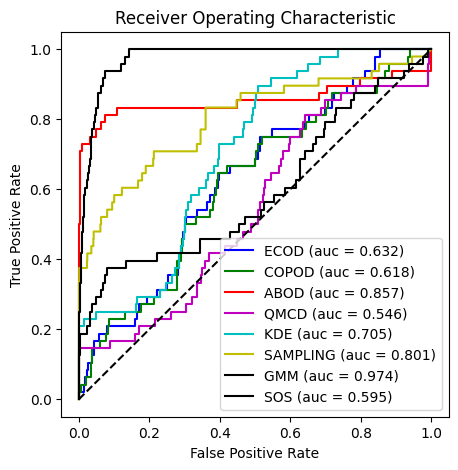

In [52]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(ground_truth_test, test_prediction_ecod_scores)
fpr_ecod, tpr_ecod, thresholds_ecod = roc_curve(ground_truth_test, test_prediction_ecod_scores)
auc_ecod = auc(fpr_ecod,tpr_ecod)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_copod_scores)
fpr_copod, tpr_copod, thresholds_copod = roc_curve(ground_truth_test, test_prediction_copod_scores)
auc_copod = auc(fpr_copod,tpr_copod)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_abod_scores)
fpr_abod, tpr_abod, thresholds_abod = roc_curve(ground_truth_test, test_prediction_abod_scores)
auc_abod = auc(fpr_abod,tpr_abod)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_sos_scores)
fpr_sos, tpr_sos, thresholds_sos = roc_curve(ground_truth_test, test_prediction_sos_scores)
auc_sos = auc(fpr_sos,tpr_sos)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_qmcd_scores)
fpr_qmcd, tpr_qmcd, thresholds_qmcd = roc_curve(ground_truth_test, test_prediction_qmcd_scores)
auc_qmcd = auc(fpr_qmcd,tpr_qmcd)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_kde_scores)
fpr_kde, tpr_kde, thresholds_kde = roc_curve(ground_truth_test, test_prediction_kde_scores)
auc_kde = auc(fpr_kde,tpr_kde)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_sampling_scores)
fpr_sampling, tpr_sampling, thresholds_sampling = roc_curve(ground_truth_test, test_prediction_sampling_scores)
auc_sampling = auc(fpr_sampling,tpr_sampling)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_gmm_scores)
fpr_gmm, tpr_gmm, thresholds_gmm = roc_curve(ground_truth_test, test_prediction_gmm_scores)
auc_gmm = auc(fpr_gmm,tpr_gmm)



plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr_ecod, tpr_ecod, linestyle='-', color='b', label='ECOD (auc = %0.3f)' % auc_ecod)

plt.plot(fpr_copod, tpr_copod, linestyle='-', color='g', label='COPOD (auc = %0.3f)' % auc_copod)

plt.plot(fpr_abod, tpr_abod, linestyle='-', color='r', label='ABOD (auc = %0.3f)' % auc_abod)

plt.plot(fpr_qmcd, tpr_qmcd, linestyle='-', color='m', label='QMCD (auc = %0.3f)' % auc_qmcd)

plt.plot(fpr_kde, tpr_kde, linestyle='-', color='c', label='KDE (auc = %0.3f)' % auc_kde)

plt.plot(fpr_sampling, tpr_sampling, linestyle='-', color='y', label='SAMPLING (auc = %0.3f)' % auc_sampling)

plt.plot(fpr_gmm, tpr_gmm, linestyle='-', color='k', label='GMM (auc = %0.3f)' % auc_gmm)

plt.plot(fpr_sos, tpr_sos, linestyle='-', color='k', label='SOS (auc = %0.3f)' % auc_sos)


plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [53]:
# GMM and ABOD works better. Next sampling.

### Neural Net

In [54]:
#AutoEncoder

classifier_name = 'AutoEncoder'

model_autoencoder = AutoEncoder(hidden_neurons=[6,64,64,6])

# Prediction on training data
model_autoencoder.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_autoencoder = model_autoencoder.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_autoencoder_scores = model_autoencoder.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_autoencoder = model_autoencoder.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_autoencoder_scores = model_autoencoder.predict_proba(data_kNN_test)[:,1]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [55]:
#DeepSVDD

classifier_name = 'DeepSVDD'

model_deepsvdd = DeepSVDD(hidden_neurons=[6,64,64,6])

# Prediction on training data
model_deepsvdd.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_deepsvdd = model_deepsvdd.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_deepsvdd_scores = model_deepsvdd.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_deepsvdd = model_deepsvdd.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_deepsvdd_scores = model_deepsvdd.predict_proba(data_kNN_test)[:,1]

35/35 [==============================] - 0s 2ms/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_13 (Dense)            (None, 6)                 36        
                                                                 
 dense_14 (Dense)            (None, 64)                384       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 64)                4096      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 net_o

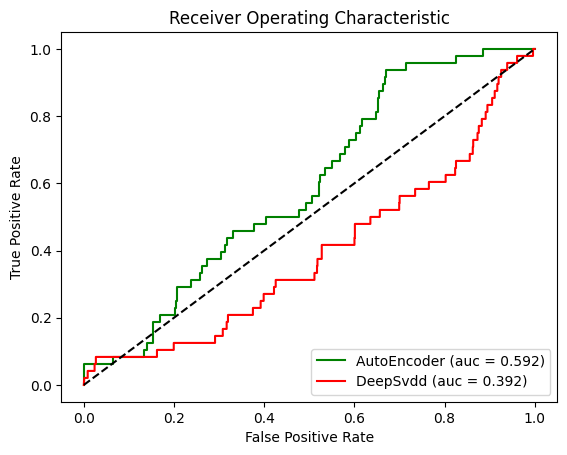

In [56]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(ground_truth_test, test_prediction_autoencoder_scores)
fpr_autoencoder, tpr_autoencoder, thresholds_autoencoder = roc_curve(ground_truth_test, test_prediction_autoencoder_scores)
auc_autoencoder = auc(fpr_autoencoder,tpr_autoencoder)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_deepsvdd_scores)
fpr_deepsvdd, tpr_deepsvdd, thresholds_deepsvdd = roc_curve(ground_truth_test, test_prediction_deepsvdd_scores)
auc_deepsvdd = auc(fpr_deepsvdd,tpr_deepsvdd)

plt.plot(fpr_autoencoder, tpr_autoencoder, linestyle='-', color='g', label='AutoEncoder (auc = %0.3f)' % auc_autoencoder)

plt.plot(fpr_deepsvdd, tpr_deepsvdd, linestyle='-', color='r', label='DeepSvdd (auc = %0.3f)' % auc_deepsvdd)


plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Outlier Ensembles

In [57]:
#XGBOD----->supervised----to do

In [58]:
#LODA
classifier_name = 'LODA'

model_loda = LODA()

# Prediction on training data
model_loda.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_loda = model_loda.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_loda_scores = model_loda.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_loda = model_loda.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_loda_scores = model_loda.predict_proba(data_kNN_test)[:,1]


#INNE
classifier_name = 'INNE'

model_inne = INNE()

# Prediction on training data
model_inne.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_inne = model_inne.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_inne_scores = model_inne.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_inne = model_inne.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_inne_scores = model_inne.predict_proba(data_kNN_test)[:,1]



#SUOD
classifier_name = 'SUOD'

model_suod = SUOD()

# Prediction on training data
model_suod.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_suod = model_suod.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_suod_scores = model_suod.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_suod = model_suod.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_suod_scores = model_suod.predict_proba(data_kNN_test)[:,1]


#FeatureBagging
classifier_name = 'FeatureBagging'

model_FeatureBagging = FeatureBagging()

# Prediction on training data
model_FeatureBagging.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_FeatureBagging = model_FeatureBagging.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_FeatureBagging_scores = model_FeatureBagging.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_FeatureBagging = model_FeatureBagging.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_FeatureBagging_scores = model_FeatureBagging.predict_proba(data_kNN_test)[:,1]


#IForest
classifier_name = 'IForest'

model_IForest = IForest()

# Prediction on training data
model_IForest.fit(data_kNN_test, y=None)  # y is ignored in unsupervised setting.
train_prediction_IForest = model_IForest.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_IForest_scores = model_IForest.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction_IForest = model_IForest.predict(data_kNN_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_IForest_scores = model_IForest.predict_proba(data_kNN_test)[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


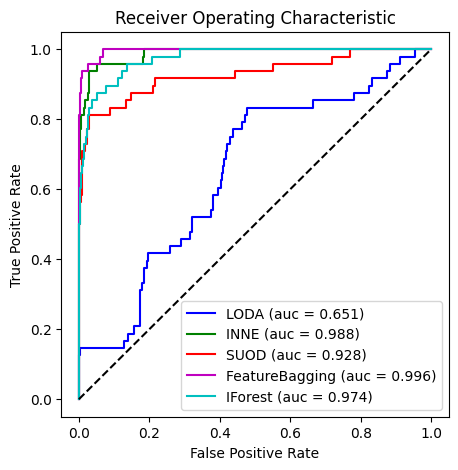

In [59]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(ground_truth_test, test_prediction_loda_scores)
fpr_loda, tpr_loda, thresholds_loda = roc_curve(ground_truth_test, test_prediction_loda_scores)
auc_loda = auc(fpr_loda,tpr_loda)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_inne_scores)
fpr_inne, tpr_inne, thresholds_inne = roc_curve(ground_truth_test, test_prediction_inne_scores)
auc_inne = auc(fpr_inne,tpr_inne)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_suod_scores)
fpr_suod, tpr_suod, thresholds_suod = roc_curve(ground_truth_test, test_prediction_suod_scores)
auc_suod = auc(fpr_suod,tpr_suod)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_FeatureBagging_scores)
fpr_FeatureBagging, tpr_FeatureBagging, thresholds_FeatureBagging = roc_curve(ground_truth_test, test_prediction_FeatureBagging_scores)
auc_FeatureBagging = auc(fpr_FeatureBagging,tpr_FeatureBagging)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_IForest_scores)
fpr_IForest, tpr_IForest, thresholds_IForest = roc_curve(ground_truth_test, test_prediction_IForest_scores)
auc_IForest = auc(fpr_IForest,tpr_IForest)



plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr_loda, tpr_loda, linestyle='-', color='b', label='LODA (auc = %0.3f)' % auc_loda)

plt.plot(fpr_inne, tpr_inne, linestyle='-', color='g', label='INNE (auc = %0.3f)' % auc_inne)

plt.plot(fpr_suod, tpr_suod, linestyle='-', color='r', label='SUOD (auc = %0.3f)' % auc_suod)

plt.plot(fpr_FeatureBagging, tpr_FeatureBagging, linestyle='-', color='m', label='FeatureBagging (auc = %0.3f)' % auc_FeatureBagging)

plt.plot(fpr_IForest, tpr_IForest, linestyle='-', color='c', label='IForest (auc = %0.3f)' % auc_IForest)


plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [60]:
# IForest, featurebagging,INNE worked best. Additionally, SUOD works best.

### Comparision between techniques

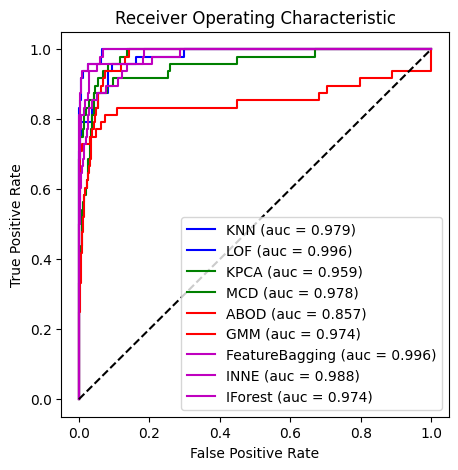

In [61]:
#Proximity-based algorithms(kNN and LoF)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_scores)
fpr, tpr, thresholds = roc_curve(ground_truth_test, test_prediction_scores)
auc_kNN = auc(fpr,tpr)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_lof_scores)
fpr_lof, tpr_lof, thresholds_lof = roc_curve(ground_truth_test, test_prediction_lof_scores)
auc_lof = auc(fpr_lof,tpr_lof)

#Linear Model(KPCA and MCD)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_kpca_scores)
fpr_kpca, tpr_kpca, thresholds_kpca = roc_curve(ground_truth_test, test_prediction_kpca_scores)
auc_kpca = auc(fpr_kpca,tpr_kpca)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_mcd_scores)
fpr_mcd, tpr_mcd, thresholds_mcd = roc_curve(ground_truth_test, test_prediction_mcd_scores)
auc_mcd = auc(fpr_mcd,tpr_mcd)


#Probabilistic Model(ABOD and GMM)
auc_roc = roc_auc_score(ground_truth_test, test_prediction_abod_scores)
fpr_abod, tpr_abod, thresholds_abod = roc_curve(ground_truth_test, test_prediction_abod_scores)
auc_abod = auc(fpr_abod,tpr_abod)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_gmm_scores)
fpr_gmm, tpr_gmm, thresholds_gmm = roc_curve(ground_truth_test, test_prediction_gmm_scores)
auc_gmm = auc(fpr_gmm,tpr_gmm)

#Ensembels Method
auc_roc = roc_auc_score(ground_truth_test, test_prediction_inne_scores)
fpr_inne, tpr_inne, thresholds_inne = roc_curve(ground_truth_test, test_prediction_inne_scores)
auc_inne = auc(fpr_inne,tpr_inne)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_FeatureBagging_scores)
fpr_FeatureBagging, tpr_FeatureBagging, thresholds_FeatureBagging = roc_curve(ground_truth_test, test_prediction_FeatureBagging_scores)
auc_FeatureBagging = auc(fpr_FeatureBagging,tpr_FeatureBagging)

auc_roc = roc_auc_score(ground_truth_test, test_prediction_IForest_scores)
fpr_IForest, tpr_IForest, thresholds_IForest = roc_curve(ground_truth_test, test_prediction_IForest_scores)
auc_IForest = auc(fpr_IForest,tpr_IForest)


plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', color='b', label='KNN (auc = %0.3f)' % auc_kNN)

plt.plot(fpr_lof, tpr_lof, linestyle='-', color='b', label='LOF (auc = %0.3f)' % auc_lof)

plt.plot(fpr_kpca, tpr_kpca, linestyle='-', color='g', label='KPCA (auc = %0.3f)' % auc_kpca)

plt.plot(fpr_mcd, tpr_mcd, linestyle='-', color='g', label='MCD (auc = %0.3f)' % auc_mcd)

plt.plot(fpr_abod, tpr_abod, linestyle='-', color='r', label='ABOD (auc = %0.3f)' % auc_abod)

plt.plot(fpr_gmm, tpr_gmm, linestyle='-', color='r', label='GMM (auc = %0.3f)' % auc_gmm)

plt.plot(fpr_FeatureBagging, tpr_FeatureBagging, linestyle='-', color='m', label='FeatureBagging (auc = %0.3f)' % auc_FeatureBagging)

plt.plot(fpr_inne, tpr_inne, linestyle='-', color='m', label='INNE (auc = %0.3f)' % auc_inne)

plt.plot(fpr_IForest, tpr_IForest, linestyle='-', color='m', label='IForest (auc = %0.3f)' % auc_IForest)

plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [62]:
# only ABOD did not work well through improved.